In [1]:
from preamble import *
from tools import plot_feature_importance
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split

### 2.3 有监督学习算法
#### 2.3.6 决策树集成
集成 ( Ensemble ) 是合并多个机器学习模型来构建更加强大模型的方法。

In [2]:
import sys
sys.path

['c:\\Users\\Administrator\\Documents\\GitHub\\introduction_to_ml_with_python',
 'c:\\Users\\Administrator\\.vscode\\extensions\\ms-python.python-2020.9.111407\\pythonFiles\\vscode_datascience_helpers\\..\\.does-not-exist',
 'c:\\Users\\Administrator\\.vscode\\extensions\\ms-python.python-2020.9.111407\\pythonFiles',
 'c:\\Users\\Administrator\\.vscode\\extensions\\ms-python.python-2020.9.111407\\pythonFiles\\lib\\python',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\python36.zip',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\DLLs',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\lib',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis',
 '',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\envs\\DataAnalysis\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anacon

##### 1. 随机森林 ( Random Forest, RF )
-   本质：是许多棵决策树的集合，其中每棵树都和其他树略有不同
-   思想：是每棵树的预测可能都相对比较好，但是都可能对部分数据过拟合。如果构造许多棵树，对这些树的结果取平均值来降低过拟合。
-   数学上严格证明了：随机森林方法既能减少过拟合，还能保持树的预测能力。
-   树的随机化方法：
    -   通过选择用于构造树的数据点
    -   通过选择每次划分测试的特征

###### 构造随机森林
-   构造随机森林模型
    -   首先，确定用于构造的树的个数
    -   其次，对数据进行自助采样，使得每棵树的数据集合尽可能不同
    -   然后，基于采样的数据分别构造决策树
###### 分析随机森林
-   随机森林给出的特征重要性比单棵决策树的特征重要性更加可靠，因此随机森林更能从总体上把握数据的特征。

In [3]:
# RandomForestClassifier()
# n_estimators表示弱学习器的数目，数目越多，效果越好，学习时间越长
# max_features表示划分需要考虑数据集的特征数目，具体参考random_forest_cancer_dataset()的绘制图形
#   - 如果是1，那么划分时无法选择对哪个特征进行测试，就只能对随机选择某个特征搜索不同的阈值。可以降低过拟合。
#   - 如果是最大值，那么生成的树将会非常相似。
#   - 默认值。分类问题是sqrt(n_features)；回归问题是n_features。
# random_state：只是个随机数生成种子，保证每次生成一样的结果
# n_jobs表示可以使用的CPU的个数。-1表示全部使用。默认值是1。
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

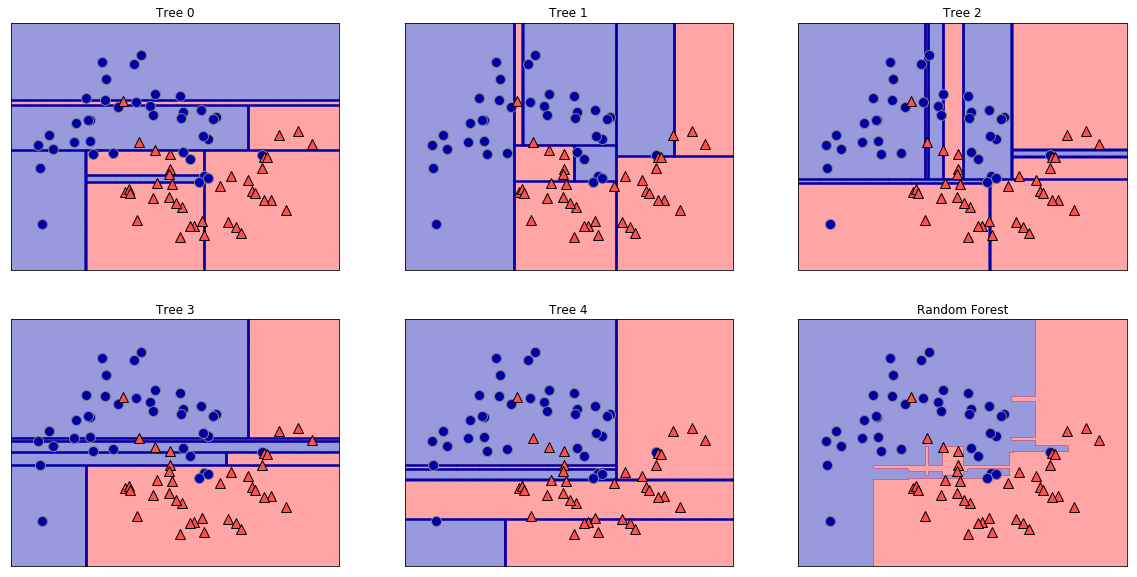

In [4]:
# 图2-33：5棵随机化的决策树找到的决策边界+随机森林对预测概率取平均得到的决策边界
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [5]:
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("训练集精度: {:.3f}".format(forest.score(X_train, y_train)))
print("测试集精度: {:.3f}".format(forest.score(X_test, y_test)))

训练集精度: 1.000
测试集精度: 0.972


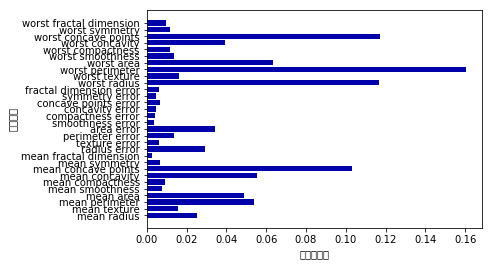

In [6]:
plot_feature_importance(forest,cancer)

###### 优点、缺点和参数
-   优点： 可以并行计算，效果比较好，不需要反复调节参数，也不需要对数据进行缩放。
-   缺点： 计算对于时间和空间的需要较大。

#### 梯度提升决策树 ( Gradient Boosted Decision Tree, GBDT ) ，也叫梯度提升机。
-   通过合并多个决策树构建更加强大的模型。
-   既可以用于回归，也可以用于分类。
-   采用连续的方式构造树，每棵树都试图纠正前一棵树的错误。
-   默认情况下，GBDT没有随机化，用到了强预剪枝。
-   主要思想：合并许多简单的模型（即弱学习器）。每个模型只能对部分数据做出好的预测，添加的树越多，性能就越好。
-   相比随机森林，参数设置更加敏感，正确地设置参数后，可以得到较高的模型精度。


In [7]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("训练集精度: {:.3f}".format(gbrt.score(X_train, y_train)))
print("测试集精度: {:.3f}".format(gbrt.score(X_test, y_test)))

训练集精度: 1.000
测试集精度: 0.965


In [8]:
# 降低学习深度，加强预剪枝
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("训练集精度: {:.3f}".format(gbrt.score(X_train, y_train)))
print("测试集精度: {:.3f}".format(gbrt.score(X_test, y_test)))

训练集精度: 0.991
测试集精度: 0.972


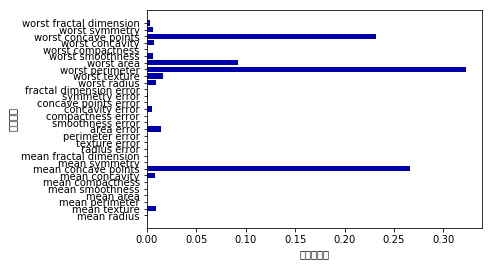

In [9]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance(gbrt,cancer)

In [10]:
# 降低学习率，加强预剪枝
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("训练集精度: {:.3f}".format(gbrt.score(X_train, y_train)))
print("测试集精度: {:.3f}".format(gbrt.score(X_test, y_test)))

训练集精度: 0.988
测试集精度: 0.965


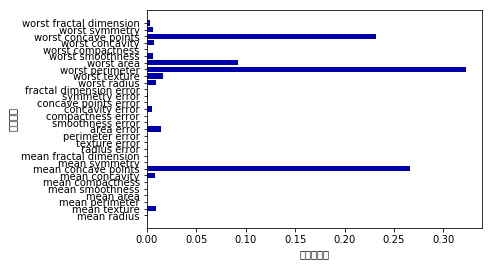

In [11]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance(gbrt,cancer)

##### 优点、缺点和参数
-   优点：不需要对数据缩放，适用于二元特征与连续特征同时存在的数据集。比随机森林消耗资源少。
-   缺点：受参数影响较大，训练时间较长。不适用于高维稀疏数据。
-   主要参数：
    -   n_estimators表示弱学习器的数目，数目越多，效果越好，学习时间越长，容易导致过拟合
    -   learning_rate：越低，就会需要更多的树构建具有同样复杂度的模型
    -   max_depth：降低每棵树的复杂度。
